In [2]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         439G  400G   16G  97% /
tmpfs            64M     0   64M   0% /dev
tmpfs           252G     0  252G   0% /sys/fs/cgroup
/dev/sdb1       7.0T  5.4T  1.3T  82% /permanent
/dev/sda2       439G  400G   16G  97% /etc/hosts
shm              32G  2.6G   30G   8% /dev/shm
tmpfs           252G   12K  252G   1% /proc/driver/nvidia
tmpfs            51G  5.9M   51G   1% /run/nvidia-persistenced/socket
udev            252G     0  252G   0% /dev/nvidia0
tmpfs           252G     0  252G   0% /proc/acpi
tmpfs           252G     0  252G   0% /proc/scsi
tmpfs           252G     0  252G   0% /sys/firmware


In [3]:
!lsblk

NAME   MAJ:MIN RM   SIZE RO TYPE MOUNTPOINT
sda      8:0    0 446.6G  0 disk 
├─sda1   8:1    0   487M  0 part 
└─sda2   8:2    0 446.2G  0 part /usr/lib/x86_64-linux-gnu/libnvidia-compiler.so
sdb      8:16   0     7T  0 disk 
└─sdb1   8:17   0     7T  0 part /permanent


In [4]:
!lsblk -o MODEL,SIZE,NAME -d

MODEL              SIZE NAME
MRROMB           446.6G sda
MRROMB               7T sdb


In [ ]:
#/permanent_tuyendt23/T4E_ADAS/duonglh/monodepth2/kitti_data/2011_09_26/2011_09_26_drive_0002_sync/image_03/data/0000000020.png

In [4]:
from mmdet.datasets import build_dataset

ModuleNotFoundError: No module named 'mmdet'

In [6]:
!nvidia-smi

Fri Jul 15 01:22:09 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  On   | 00000000:06:00.0 Off |                    0 |
| N/A   27C    P0    52W / 300W |   1940MiB / 32480MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-SXM2...  On   | 00000000:07:00.0 Off |                    0 |
| N/A   31C    P0    70W / 300W |  21780MiB / 32480MiB |      7%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

In [ ]:
#/permanent_tuyendt23/T4E_ADAS/duonglh/monodepth2/kitti_data/2011_09_26/2011_09_26_drive_0001_sync/image_03/data/0000000030.png

In [18]:
!ls kitti_data/2011_09_26/2011_09_26_drive_0001_sync

image_00  image_01  image_02  image_03	oxts  velodyne_points


# Generate depth sample map

In [1]:
from kitti_utils import generate_depth_map
import os
import matplotlib.pyplot as plt
import skimage.transform

In [2]:
image_path = '/permanent_tuyendt23/T4E_ADAS/duonglh/monodepth2/kitti_data/2011_09_26/2011_09_26_drive_0001_sync/image_03/data/0000000030.png'

In [3]:
data_path = 'kitti_data/2011_09_26/'
folder = '2011_09_26_drive_0001_sync'
frame_index = 30
full_res_shape = (1242, 375)

In [4]:
calib_path = 'kitti_data/2011_09_26'
side_map = {"2": 2, "3": 3, "l": 2, "r": 3}
velo_filename = os.path.join(
    data_path,
    folder,
    "velodyne_points/data/{:010d}.bin".format(int(frame_index)))

depth_gt = generate_depth_map(calib_path, velo_filename, 3)

In [5]:
plt.imread(image_path).shape

(375, 1242, 3)

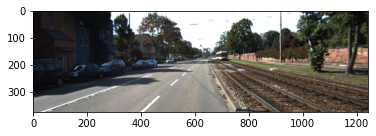

In [6]:
plt.imshow(plt.imread(image_path))
# plt.axis('off')
plt.show()

In [9]:
len(depth_gt[depth_gt>0])

18999

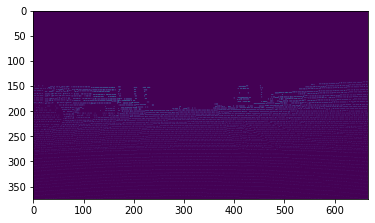

In [73]:
plt.imshow(depth_gt[:, 287:954])
plt.show()

In [76]:
depth_gt[:, 287:954][200, 200:250]

array([ 0.        , 47.56085274,  0.        , 47.35592258,  0.        ,
       47.0760089 ,  0.        ,  0.        , 47.02702337, 46.77110639,
        0.        , 46.71111975,  0.        , 46.53417222,  0.        ,
        0.        , 46.47918675,  0.        , 46.37621314,  0.        ,
       46.25424338,  0.        , 46.08329273,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [56]:
depth_gt2 = skimage.transform.resize(
            depth_gt, full_res_shape[::-1], order=0, preserve_range=True, mode='constant')

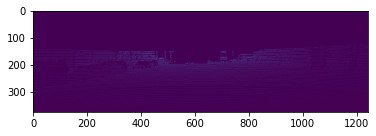

In [57]:
plt.imshow(depth_gt2)
plt.show()

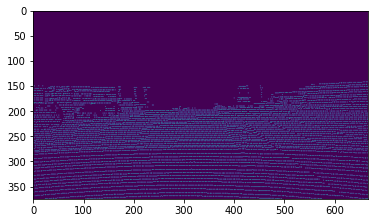

In [77]:
plt.imshow(depth_gt[:, 287:954]>0)
plt.show()

In [89]:
depth_map_sample = depth_gt[:, 287:954].flatten()
depth_map_sample.shape

(250125,)

In [91]:
import numpy as np

nansIndx = np.where(depth_map_sample == 0)[0]
isanIndx = np.where(depth_map_sample != 0)[0]
for nan in nansIndx:
    replacementCandidates = np.where(isanIndx>nan)[0]
    if replacementCandidates.size != 0:
        replacement = depth_map_sample[isanIndx[replacementCandidates[0]]]
    else:
        replacement = depth_map_sample[isanIndx[np.where(isanIndx<nan)[0][-1]]]
    depth_map_sample[nan] = replacement

In [92]:
depth_gt[:, 287:954].shape

(375, 667)

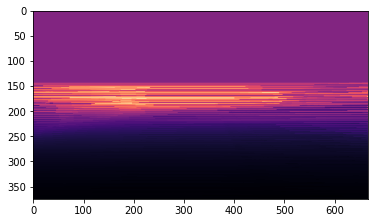

In [111]:
plt.imshow(depth_map_sample.reshape((375, 667)), cmap='magma')
plt.show()

In [110]:
# depth_map_sample.reshape((375, 667))[:, 350]

In [115]:
import cv2

In [131]:
depth_map_sample_320 = cv2.resize(depth_map_sample.reshape((375, 667)), (320, 320), interpolation = cv2.INTER_NEAREST)

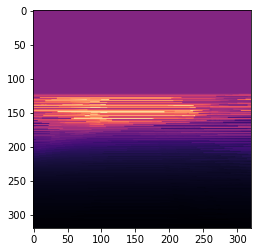

In [132]:
plt.imshow(depth_map_sample_320, cmap='magma')
plt.show()

In [135]:
ma, mi = depth_map_sample_320.max(), depth_map_sample_320.min()
mi, ma

(5.285466603729169, 78.80694103031108)

In [136]:
depth_map_sample_320 = (depth_map_sample_320 - mi)*(ma-mi) / ma

In [137]:
depth_map_sample_320.min()

0.0

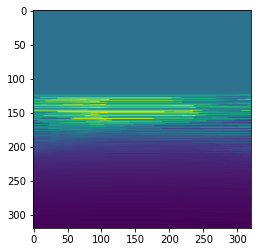

In [138]:
plt.imshow(depth_map_sample_320)

In [141]:
import numpy as np 
depth_map_sample_320 = depth_map_sample_320 + 0.5
np.save('depth_map_sample_320.npy', depth_map_sample_320)

In [142]:
depth_map_sample_320.max(), depth_map_sample_320.min()

(69.09049635969863, 0.5)

In [7]:
from accelerate import Accelerator

ModuleNotFoundError: No module named 'accelerate'